#Загрузите датасет Olivetti faces

In [ ]:
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces()
print(faces.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   ===========

#Выведите несколько изображений на экран используя инструментарий библиотеки matplotlib

Text(0.5, 1.0, 'Fourth')

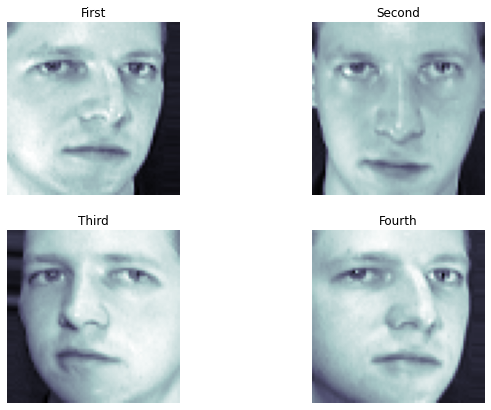

In [ ]:
from matplotlib import pyplot as plt
X = faces.images

fig = plt.figure(figsize=(10, 7))
rows = 2
columns = 2
  
fig.add_subplot(rows, columns, 1)

plt.imshow(X[1], cmap=plt.cm.bone)
plt.axis('off')
plt.title("First")

fig.add_subplot(rows, columns, 2)
  
plt.imshow(X[2], cmap=plt.cm.bone)
plt.axis('off')
plt.title("Second")
  
fig.add_subplot(rows, columns, 3)

plt.imshow(X[3], cmap=plt.cm.bone)
plt.axis('off')
plt.title("Third")
  
fig.add_subplot(rows, columns, 4)

plt.imshow(X[4], cmap=plt.cm.bone)
plt.axis('off')
plt.title("Fourth")

#Разделите эти данные на тестовую и обучающую выборки

In [ ]:
X = faces["data"]
imgs = faces["images"]
y = faces["target"]
X

array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
        0.1570248 ],
       [0.45454547, 0.47107437, 0.5123967 , ..., 0.15289256, 0.15289256,
        0.15289256],
       [0.3181818 , 0.40082645, 0.49173555, ..., 0.14049587, 0.14876033,
        0.15289256],
       ...,
       [0.5       , 0.53305787, 0.607438  , ..., 0.17768595, 0.14876033,
        0.19008264],
       [0.21487603, 0.21900827, 0.21900827, ..., 0.57438016, 0.59090906,
        0.60330576],
       [0.5165289 , 0.46280992, 0.28099173, ..., 0.35950413, 0.3553719 ,
        0.38429752]], dtype=float32)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,
                                                    random_state=True)

set(y_train)

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39}

In [ ]:
len(y_test)

80

#Постройте модель классификатора метода опорных векторов для идентификации человека по изображению

In [ ]:
from sklearn.svm import SVC
# define the SVM classifier with a Radial Basis Function (RBF) kernel.
clf = SVC( gamma="scale", random_state=0)

In [ ]:
clf.fit(X_train, y_train)

SVC(random_state=0)

In [ ]:
y_pred = clf.predict(X_test)
y_pred

array([39,  3, 32, 33, 17, 34, 19, 29,  2, 28, 17, 37, 18, 32, 32,  3, 37,
        0,  0,  8, 12, 24, 28, 21,  1,  9, 36, 20, 36, 20,  8,  0, 16, 27,
       15,  8,  5, 10, 39, 13, 26, 20, 17,  6, 38,  8, 38, 30, 31, 27,  6,
        8,  3,  1, 29, 28, 27, 11, 25, 36, 10,  6, 15, 24,  6,  8, 10, 31,
       27, 31, 21,  9,  6, 38,  1, 34,  4, 18, 13, 24])

Оцените качество модели на тестовой выборке с помощью следующих метрик:

-достоверность предсказания (accuracy);

-точность (precision);

-полнота (recall)

In [ ]:
from sklearn import metrics

In [ ]:
metrics.accuracy_score(y_test, y_pred)

0.8375

In [ ]:
metrics.precision_score(y_test, y_pred, average='micro')

0.8375

In [ ]:
metrics.recall_score(y_test, y_pred, average='micro')

0.8375

#Постройте кривую обучения - график зависимости тестовой и обучающей эффективности от размера обучающей выборки

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn import datasets
import matplotlib.pyplot as plt
import  numpy as np


In [ ]:
def plot_learning_curve(x_train, x_test, y_train_, y_test, model, name):
  # Создайте конвейер; Это будет передано в качестве оценки в метод кривой обучения
  pipeline = make_pipeline(StandardScaler(), model)

  # Используйте кривую обучения, чтобы получить результаты тренировок и тестов, а также размеры поездов
  train_sizes, train_scores, test_scores = learning_curve(estimator=pipeline, X=x_train, y=y_train,
  cv=10, train_sizes=np.linspace(0.1, 1.0, 10),
  n_jobs=1)

  # Рассчитайте среднее значение обучения и тестирования и std
  train_mean = np.mean(train_scores, axis=1)
  train_std = np.std(train_scores, axis=1)
  test_mean = np.mean(test_scores, axis=1)
  test_std = np.std(test_scores, axis=1)

  # Постройте кривую обучения
  plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
  plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
  plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
  plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
  plt.title(f'Learning Curve of {name}')
  plt.xlabel('Training Data Size')
  plt.ylabel('Model accuracy')
  plt.grid()
  plt.legend(loc='lower right')
  plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  UserWarning,


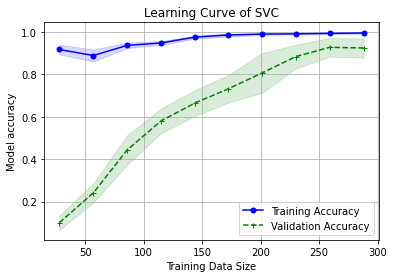

In [ ]:
plot_learning_curve(X_train, X_test, y_train, y_test, clf, 'SVC')

#Постройте модели классификации на основе следующих методов:

-логистическая регрессия (LogisticRegression);

-метод опорных векторов с гауссовым ядром (SVC);

-метод опорных векторов с полиномиальным ядром (SVC);

-метод k ближайших соседей (KNeighborsClassifier);

-многослойный перцептрон (MLP);
другие методы по желанию;

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
%%time

cls = LogisticRegression()
cls.fit(X_train, y_train)
y_pred = cls.predict(X_test)
import time
time.sleep(1)
time.sleep(0.2)

cls

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


CPU times: user 6.2 s, sys: 2.27 s, total: 8.47 s
Wall time: 6.19 s


LogisticRegression()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix 
print(confusion_matrix(y_test,y_pred)) 
print(classification_report(y_test,y_pred))

[[3 0 0 ... 0 0 0]
 [0 3 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 4 0]
 [0 0 0 ... 0 0 2]]
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         1
           3       0.00      0.00      0.00         0
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         3
           7       0.00      0.00      0.00         1
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         1
          12       1.00      0.50      0.67         2
          13       1.00      1.00      1.00         2
          16       1.00      1.00      1.00         1
          17   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

In [ ]:
from sklearn.svm import SVC

In [ ]:
%%time

clr = SVC(kernel='rbf', random_state=True)
clr.fit(X_train, y_train)
y_pred = clr.predict(X_test)

import time
time.sleep(1)
time.sleep(0.2)

CPU times: user 429 ms, sys: 2.77 ms, total: 432 ms
Wall time: 1.62 s


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix 
print(confusion_matrix(y_test,y_pred)) 
print(classification_report(y_test,y_pred))

[[2 0 0 ... 0 0 0]
 [0 3 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 3 0]
 [0 0 0 ... 0 0 2]]
              precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         1
           3       0.00      0.00      0.00         0
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       0.60      1.00      0.75         3
           7       0.00      0.00      0.00         1
           8       0.50      1.00      0.67         3
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         1
          12       1.00      0.50      0.67         2
          13       1.00      1.00      1.00         2
          15       0.00      0.00      0.00         0
          16   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

In [ ]:
from sklearn.svm import SVC

In [ ]:
%%time

clm = SVC(kernel='poly', random_state=True)
clm.fit(X_train, y_train)
y_pred = clm.predict(X_test)
import time
time.sleep(1)
time.sleep(0.2)

CPU times: user 308 ms, sys: 4.3 ms, total: 312 ms
Wall time: 1.5 s


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix 
print(confusion_matrix(y_test,y_pred)) 
print(classification_report(y_test,y_pred))

[[3 0 0 ... 0 0 0]
 [0 3 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 4 0]
 [0 0 0 ... 0 0 2]]
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         1
           3       0.00      0.00      0.00         0
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       0.60      1.00      0.75         3
           7       0.00      0.00      0.00         1
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         1
          12       1.00      0.50      0.67         2
          13       1.00      1.00      1.00         2
          16       1.00      1.00      1.00         1
          17   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
%%time

model1 = KNeighborsClassifier(n_neighbors=3)
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)
y_pred
import time
time.sleep(1)
time.sleep(0.2)

NameError: ignored

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix 
print(confusion_matrix(y_test,y_pred)) 
print(classification_report(y_test,y_pred))

[[3 0 0 ... 0 0 0]
 [0 3 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 3 0]
 [1 0 0 ... 0 0 1]]
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         1
           3       0.00      0.00      0.00         0
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       0.50      0.33      0.40         3
           7       0.00      0.00      0.00         1
           8       0.75      1.00      0.86         3
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         1
          12       0.00      0.00      0.00         2
          13       1.00      1.00      1.00         2
          14       0.00      0.00      0.00         0
          16   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
%%time

model2 = MLPClassifier()
model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)
y_pred

import time
time.sleep(1)
time.sleep(0.2)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


CPU times: user 8.41 s, sys: 3.42 s, total: 11.8 s
Wall time: 7.42 s


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix 
print(confusion_matrix(y_test,y_pred)) 
print(classification_report(y_test,y_pred))

[[2 0 0 ... 0 0 0]
 [0 3 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 3 0]
 [0 0 0 ... 0 0 1]]
              precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         1
           4       0.50      1.00      0.67         1
           5       1.00      1.00      1.00         1
           6       1.00      0.67      0.80         3
           7       0.00      0.00      0.00         1
           8       0.75      1.00      0.86         3
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         3
          11       0.00      0.00      0.00         1
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         2
          16       1.00      1.00      1.00         1
          17       0.40      0.67      0.50         3
          18   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Проанализируйте метрики каждой модели и сделайте выводы об их эффективности и применимости. Сравните эффективность всех этих моделей и выберите лучшую

Наиболее качество работает модель логистической регрессии.


#Для каждой модели из п.3 постройте кривые обучения и диагностируйте недо-/переобучение модели. Попробуйте изменить параметр регуляризации для улучшения результатов модели


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn import datasets
import matplotlib.pyplot as plt

In [ ]:
def plot_learning_curve(x_train, x_test, y_train_, y_test, model, name, ax):
  # Создайте конвейер; Это будет передано в качестве оценки в метод кривой обучения
  pipeline = make_pipeline(StandardScaler(), model)

  # Используйте кривую обучения, чтобы получить результаты тренировок и тестов, а также размеры поездов
  train_sizes, train_scores, test_scores = learning_curve(estimator=pipeline, X=x_train, y=y_train,
  cv=10, train_sizes=np.linspace(0.1, 1.0, 10),
  n_jobs=1)

  # Рассчитайте среднее значение обучения и тестирования и std
  train_mean = np.mean(train_scores, axis=1)
  train_std = np.std(train_scores, axis=1)
  test_mean = np.mean(test_scores, axis=1)
  test_std = np.std(test_scores, axis=1)

  # Постройте кривую обучения
  ax.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
  ax.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
  ax.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
  ax.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
  ax.set_title(f'Learning Curve of {name}')
  ax.set_xlabel('Training Data Size')
  ax.set_ylabel('Model accuracy')
  ax.grid()
  ax.legend(loc='lower right')


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  UserWarning,


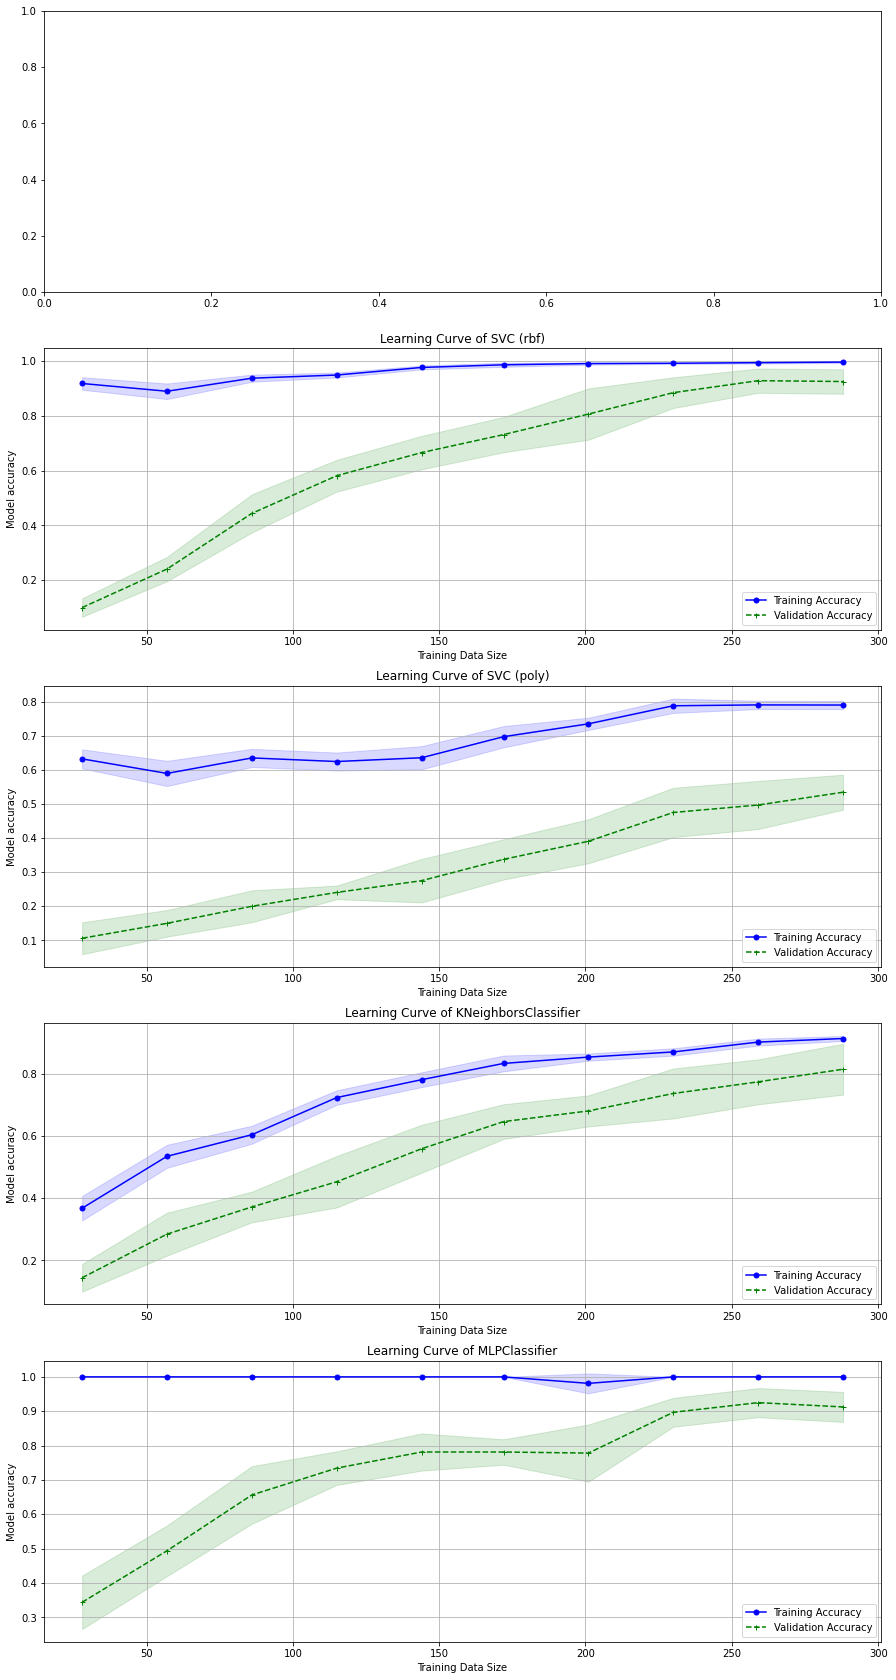

In [ ]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, figsize=(15, 30))

#plot_learning_curve(X_train, X_test, y_train, y_test, cls, 'LogisticRegression', ax1)
plot_learning_curve(X_train, X_test, y_train, y_test, clr, 'SVC (rbf)', ax2)
plot_learning_curve(X_train, X_test, y_train, y_test, clm, 'SVC (poly)', ax3)
plot_learning_curve(X_train, X_test, y_train, y_test, model1, 'KNeighborsClassifier', ax4)
plot_learning_curve(X_train, X_test, y_train, y_test, model2, 'MLPClassifier', ax5)